In [1]:
!pip install nltk


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer


In [3]:
df = pd.read_csv('data.csv')


In [4]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df['Tweet'] = df['Tweet'].apply(lambda x: x.lower())#lowercase

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'(@[\w]+\s)+','username ',x))#username

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'http\S+|www\S+','http',x))#link

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'#(([\w]+\s[\w]+)+)',r'\1',x))#hashtags

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'(#[\w]+)+',' ',x))#hashtags

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub('[^\w\s]','',x))#punctuation and all emojis

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub('amp','and',x))

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub('\s+',' ',x))#remove whitespaces

df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))#lemmatization


In [6]:
df['category'] = df['Label'].apply(lambda x: 1 if x =='Joyous' else 2 if x =='Sarcasm' else 0)

In [7]:
df.head()

,Label,Tweet,category
0,Schadenfreude,username did the police officer in question th...,0
1,Schadenfreude,username please report to the carwash your bit...,0
2,Sarcasm,username right wing christianity is a mean and...,2
3,Schadenfreude,username it part of history so no it wont what...,0
4,Sarcasm,username i guess the forecast wa wrong but at ...,2


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


In [9]:
X, y = df['Tweet'], df['category']
metrics = []

skf = KFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = TfidfVectorizer(ngram_range=(1,3), max_features=1500)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print(classification_report(y_test, y_pred_class))

Mean accuracy:  0.6684991640748316
Std for accuracy:  0.009397306095961885
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       305
           1       0.59      0.86      0.70       280
           2       0.79      0.38      0.51       216

    accuracy                           0.68       801
   macro avg       0.72      0.66      0.65       801
weighted avg       0.71      0.68      0.67       801



In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

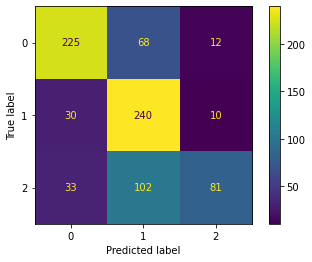

In [11]:
cm = confusion_matrix(y_test, y_pred_class, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

In [12]:
X, y = df['Tweet'], df['category']
metrics = []

skf = KFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = TfidfVectorizer(ngram_range=(1,3), max_features=1500)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    svm = SVC()
    svm.fit(X_train_dtm, y_train)
    y_pred_class = svm.predict(X_test_dtm)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print(classification_report(y_test, y_pred_class))

Mean accuracy:  0.7286116792911603
Std for accuracy:  0.01927902987335098
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       305
           1       0.64      0.94      0.76       280
           2       0.77      0.38      0.51       216

    accuracy                           0.73       801
   macro avg       0.76      0.70      0.70       801
weighted avg       0.76      0.73      0.72       801



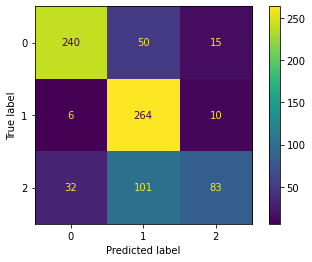

In [13]:
cm = confusion_matrix(y_test, y_pred_class, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [14]:
X, y = df['Tweet'], df['category']
metrics = []

skf = KFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = TfidfVectorizer(ngram_range=(1,3), max_features=1500)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    lr = LogisticRegression()
    lr.fit(X_train_dtm, y_train)
    y_pred_class = lr.predict(X_test_dtm)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print(classification_report(y_test, y_pred_class))

Mean accuracy:  0.7106534537563706
Std for accuracy:  0.02071168146422796
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       305
           1       0.66      0.89      0.76       280
           2       0.72      0.41      0.52       216

    accuracy                           0.72       801
   macro avg       0.73      0.69      0.69       801
weighted avg       0.73      0.72      0.71       801



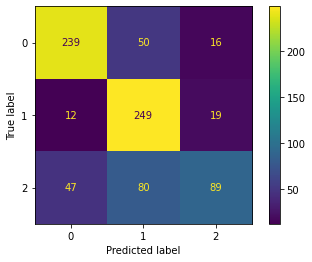

In [15]:
cm = confusion_matrix(y_test, y_pred_class, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
# The code as well as codes for other experiments were adapted from following https://stackoverflow.com/questions/62591306/applying-k-fold-validation-for-text-classification